<a href="https://colab.research.google.com/github/Nitesh2206/python-kernels/blob/master/Data_Visualisation_using_Seaborn_on_Pokemon_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup and description

In [0]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from math import pi
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [2]:
# Connect to kaggle datasets
import os
os.environ['KAGGLE_USERNAME'] = "nitesh2206" # username from the json file 
os.environ['KAGGLE_KEY'] = "" 
!kaggle datasets download -d abcsds/pokemon

df_pkmn = pd.read_csv("../content/pokemon.zip")


  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 24.8MB/s]


In [3]:
df_pkmn.info()
# Type 2 has null entries as not all pokemon have a second type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df_pkmn.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df_pkmn.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000



| Column Name | Description |
| --- | --- |
|#| ID for each pokemon|
|Name|Name of each pokemon|
|Type 1| Each pokemon has a type, this determines weakness resistance to attacks|
|Type 2| Some pokemon are dual type and have 2 types|
|Total| sum of all stats that come after this, a general guide to how strong a pokemon is|
|HP| hit points, or health, defines how much damage a pokemon can withstand before fainting|
|Attack| the base modifier for normal attacks (eg. Scratch, Punch)|
|Defense| the base damage resistance against normal attacks|
|SP Atk| special attack, the base modifier for special attacks(e.g. fire blast, bubble beam)|
|SP Def| the base damage resistance against special attacks|
|Speed| determines which pokemon attacks first each round|
|Generation| the generation in which the pokemon was introduced|
|Legendary| if a pokemon has legendary status(very rare pokemon) |

## 2.CountPlot

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

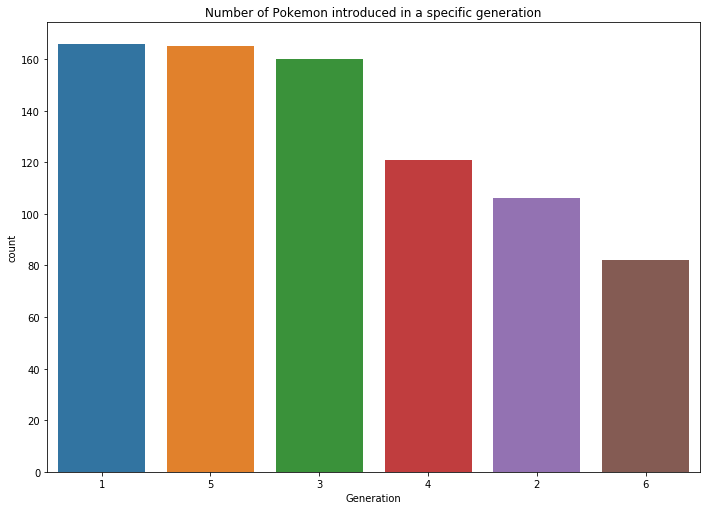

In [6]:
sns.countplot(x="Generation", data=df_pkmn,
              order=df_pkmn['Generation'].value_counts().index).set_title('Number of Pokemon introduced in a specific generation')
df_pkmn['Generation'].value_counts()

###1st generation introduced the most number of pokemons.

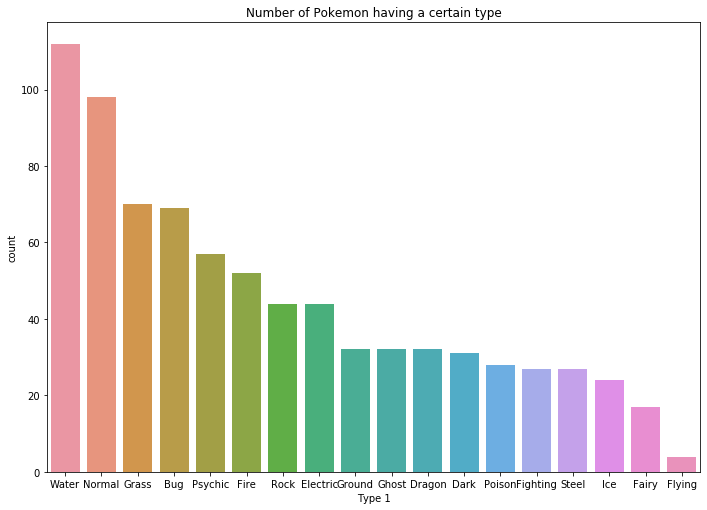

In [7]:
sns.countplot(x="Type 1", data=df_pkmn, order=df_pkmn['Type 1'].value_counts().index).set_title('Number of Pokemon having a certain type')
plt.show()

Water Type pokemon are the most common followed by normal while flying type is the least common.

# 2. Boxplot with stripplot

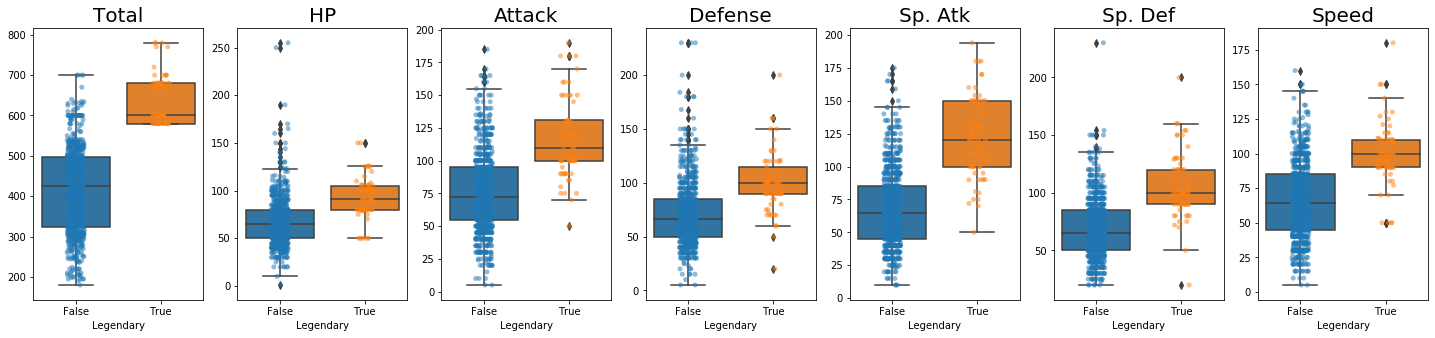

In [8]:
f, axes = plt.subplots(1, 7,figsize=(25, 5))
for idx,key in enumerate(['Total','HP',	'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']):
  sns.boxplot(y=key, x="Legendary",data=df_pkmn, ax=axes[idx]).set_title(key,fontsize=20)
  sns.stripplot(y=key, x="Legendary",data=df_pkmn, ax=axes[idx],jitter=True,alpha=0.5)
  axes[idx].set_ylabel('')  

## The above boxplot shows that legendary pokemon have higher stats than non-legendary pokemon.

# 3. Swarmplot

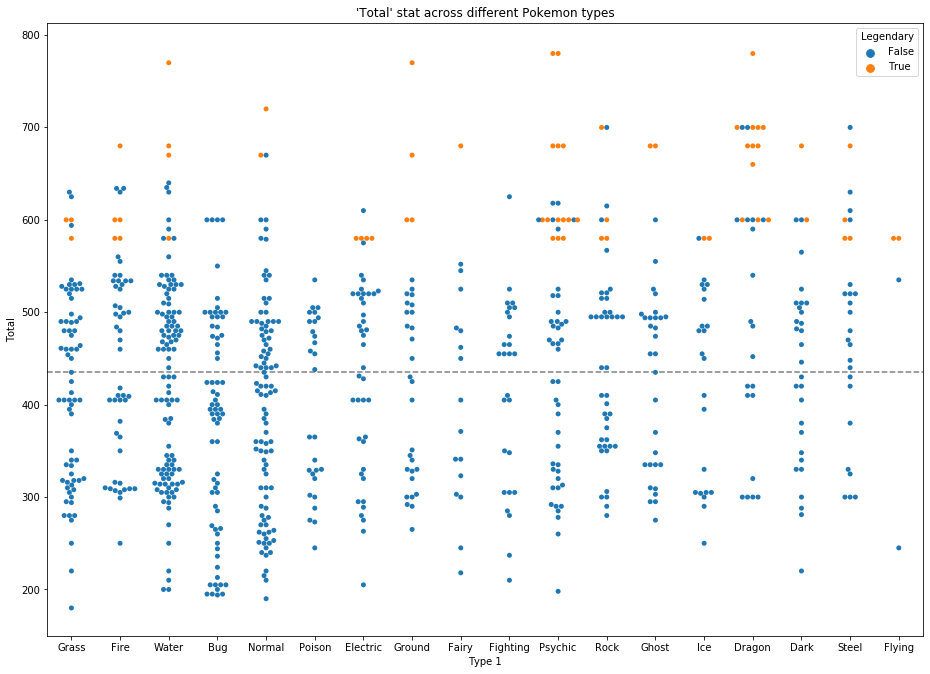

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 11.27)
sns.swarmplot(y='Total',x="Type 1",data=df_pkmn,hue='Legendary', ax=ax)
plt.axhline(df_pkmn['Total'].mean(), linestyle='dashed', color='grey')
plt.title('\'Total\' stat across different Pokemon types')
plt.show()

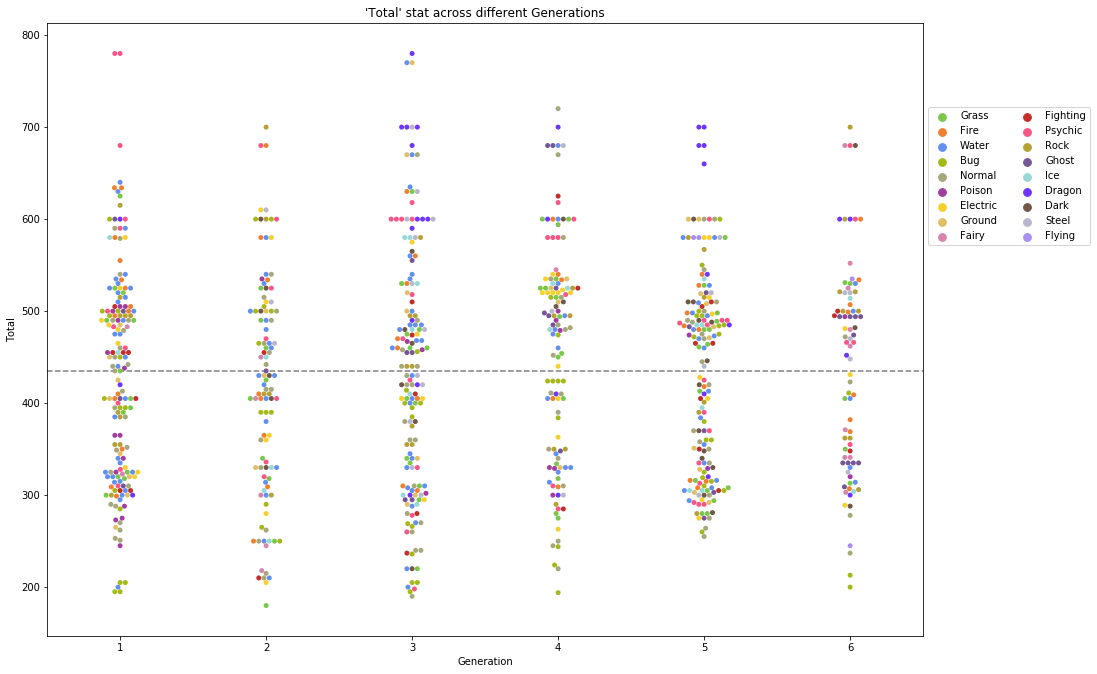

In [10]:
 # Make a dictionary with one specific color per type:
custom_pal = {"Normal": "#A8A77A","Fire":"#EE8130","Water":"#6390F0",
              "Electric":"#F7D02C","Grass":"#7AC74C","Ice":"#96D9D6",
              "Fighting":"#C22E28","Poison":"#A33EA1","Ground":"#E2BF65",
              "Flying":  "#A98FF3","Psychic":"#F95587","Bug":"#A6B91A",
              "Rock":"#B6A136","Ghost":"#735797","Dragon":"#6F35FC",
              "Dark":"#705746","Steel":"#B7B7CE","Fairy":"#D685AD"}

fig, ax = plt.subplots()
fig.set_size_inches(15.7, 11.27)
sns.swarmplot(y='Total',x="Generation",data=df_pkmn,hue="Type 1",palette=custom_pal, ax=ax).legend(loc='center left', bbox_to_anchor=(1, 0.75), ncol=2)
plt.axhline(df_pkmn['Total'].mean(), linestyle='dashed', color='grey')
plt.title('\'Total\' stat across different Generations')
plt.show()

# 4. Violinplot

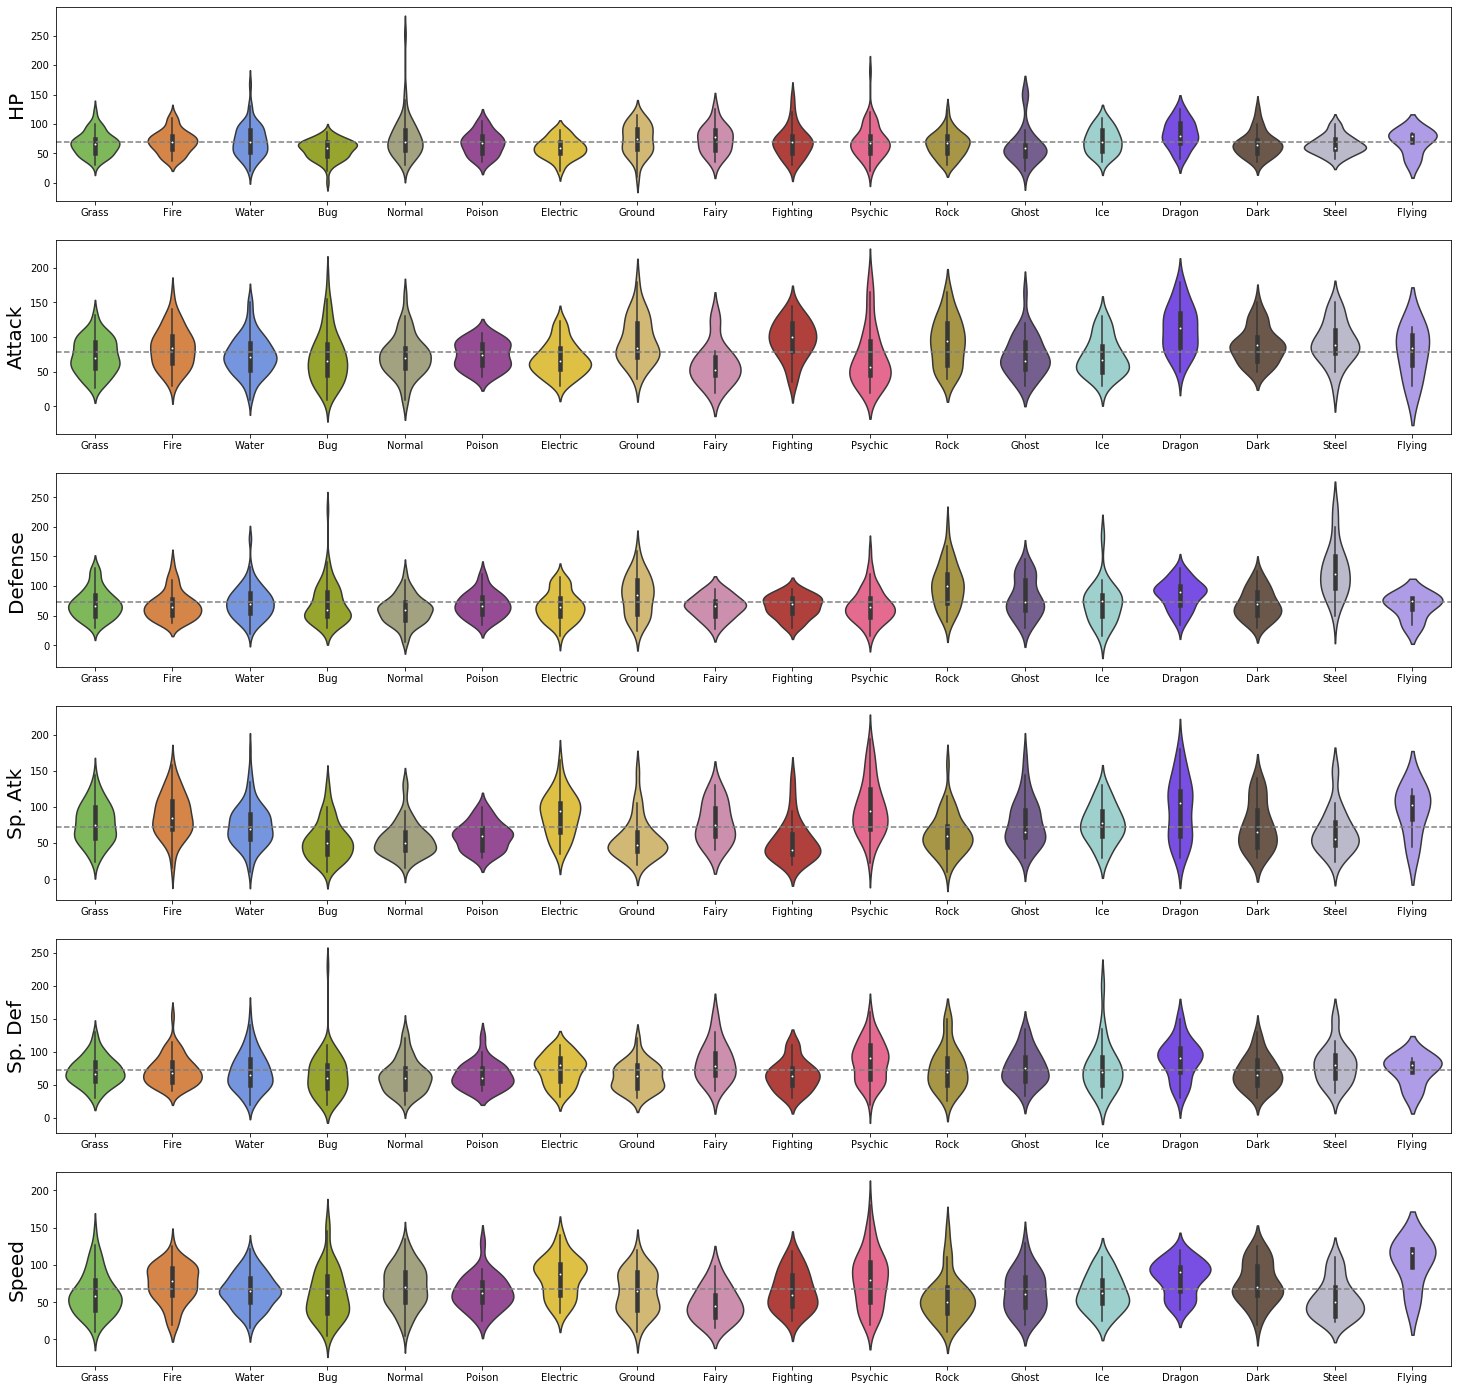

In [11]:
f, axes = plt.subplots(6,figsize=(25, 25))

for idx,key in enumerate(['HP',	'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']):
  sns.violinplot(y=key, x="Type 1",data=df_pkmn, ax=axes[idx], palette=custom_pal)
  axes[idx].axhline(df_pkmn[key].mean(), linestyle='dashed', color='grey')
  axes[idx].yaxis.label.set_size(20)
  axes[idx].set_xlabel('')

## Interesting observations in Violin Chart
### <b>HP</b>  
<ul><li>Some Normal type pokemon have unsually high HP stat.</li></ul>

### <b>Attack</b>  
<ul><li>Dragon type pokemon have the highest meadian Attack stat </li>
<li> While Bug and Psychic type show the highest variation in Attack stat </li>
</ul>

### <b>Defense</b>  
<ul><li>Steel and Rock type pokemon have high Defense Stat </li>
<li> A Bug type pokemon has a very high Defense Stat </li>
</ul>

### <b>Sp Attack</b>  
<ul><li>Psychic, Dragon and Flying type have the high Sp Atk. </li>
<li>Ground, Fighting, Steel and Rock have low Sp Atk.</li>
</ul>

### <b> Sp Defense </b>
<ul><li> A Bug type pokemon has a very high Sp Defense Stat </li>
</ul>

### <b> Speed </b>
<ul><li> Speed is the highest for Flying type Pokemon. </li>
</ul>






In [12]:
#@title The normal-type pokemons with unusually high HP are <b>Blissey</b> and <b>Chansey</b>.

df_pkmn.sort_values(by=['HP'],ascending=False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False


In [13]:
#@title The bug-type pokemon with unusually high Defense and Sp. Defense is <b>Shuckle</b>.

df_pkmn.sort_values(by=['Defense'],ascending=False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True


# 5. Radar Chart

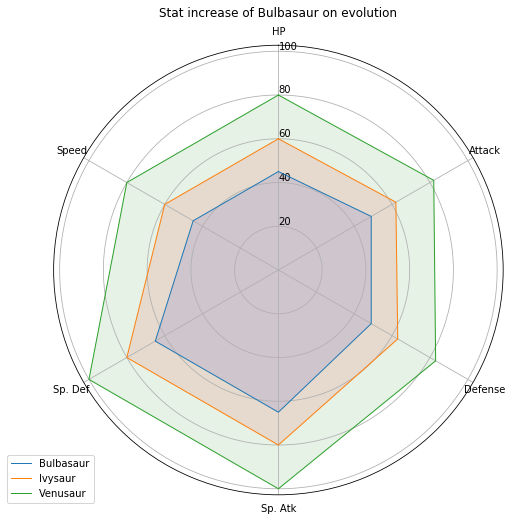

In [14]:
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=['HP',	'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)

 
 
# ------- PART 2: Add plots
 
# Bulbasaur
values=df_pkmn.loc[0,'HP':'Speed'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=df_pkmn.loc[0,'Name'])
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ivysaur
values=df_pkmn.loc[1,'HP':'Speed'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=df_pkmn.loc[1,'Name'])
ax.fill(angles, values, 'r', alpha=0.1)

# Venusaur
values=df_pkmn.loc[2,'HP':'Speed'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label=df_pkmn.loc[2,'Name'])
ax.fill(angles, values, 'g', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Stat increase of Bulbasaur on evolution')
plt.show()

## The above radarchart shows how the stats increase when a pokemon goes through evolution.




# 6. Heatmap

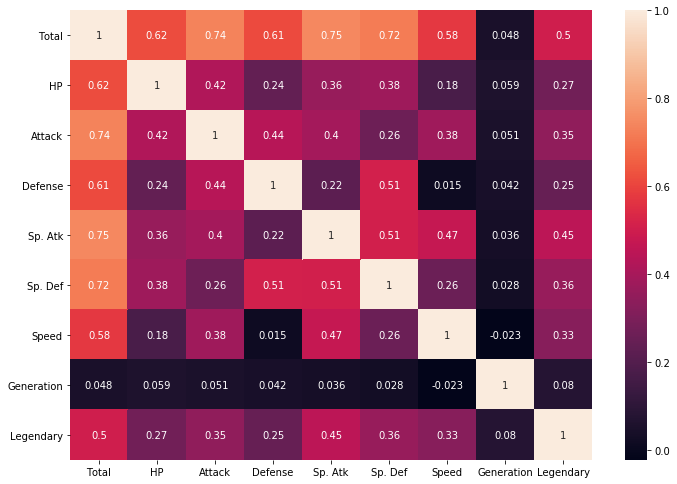

In [15]:
sns.heatmap(df_pkmn.loc[:,'Total':"Legendary"].corr(),annot=True) # Exclude ID
plt.show()

## Total has high correlation with most of the stats as it is the sum of all stats.
## Sp Def has high correlation with Defense and Sp.Atk.